<a href="https://colab.research.google.com/github/sharathreddy241/Linear-Regression-ML-Model-for-predicting-Rental-Bike-Count/blob/main/Bike_Sharing_Demand_Prediction_Linear_Regression_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Rental bike count prediction using Linear Regression Machine Learning model



#**Project Type**    - Regression
##### **Contribution**    - Individual
##### **Author -** S Sharath Kumar Reddy

# **Project Summary -**

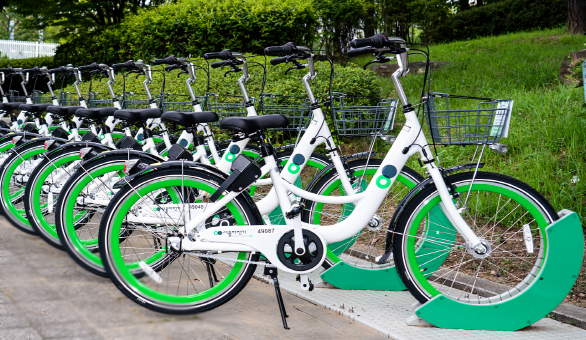

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. Rental Stations are installed near highly accessible areas and popular destinations like subway entrances/exits, bus stops, residential complexes, public offices, schools, and banks. Rental stations are unmanned stands for the rental and return of bikes. Users can rent and return bicycles at any rental station as per their convenience. This service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation and also resolves traffic congestion and air pollution issues.
In recent years, the demand for bike rentals has increased, leading to the need for a more efficient and effective way to manage the bike sharing operations. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals based on the provided historical data. We will be using the linear regression techniques to model the bike demand prediction. The model trained on a large dataset of past bike rental information, along with relevant factors such as weather, temperature, snowfall and visibility. The model then will be tested and evaluated using metrics such as mean squared error and r-squared values for checking the performance of the ML model.
The main goal of project is to predict the rental bike count with good accuracy, which will help the bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time. We will perform lot of regression algorithms like linear regression, random forest, decision tree, gradient boosting, Support Vector Machine along with hyperparameter tuning and cross validation to improve the accuracy of the model.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes which resolves traffic and air pollution problem thereby provoding the convenient and eco-friendly mode of transportation. Our goal is to develop a regression ML model with a minimum accuracy of 90% by training the model with the provided data.  

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import zscore
import missingno as msno
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install shap
import shap

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
bike_data=pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Machine Learning/SeoulBikeData.csv',parse_dates=True, encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
bike_data

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_data.shape

### Dataset Information

In [ ]:
# Dataset Info
bike_data.info()

In [ ]:
bike_data.describe(include='all')

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bike_data.duplicated().value_counts()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_data.isnull().sum()

In [ ]:
# Visualizing the missing values
msno.bar(bike_data,color='blue', figsize=(4,4),fontsize=10)

### What did you know about your dataset?

The given dataset contains hourly rented bike information from December 2017 to November 2018, which includes columns of weather conditions and other factors which influence the bike rental.

The above dataset has 8,760 rows and 14 columns.

There are no missing and duplicate values in the dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_data.columns

In [ ]:
# Dataset Describe
bike_data.describe()

### Variables Description

Description of the variables:

* **Date** : Date of the observation recorded.
* **Rented Bike Count** : Number of bikes rented during the observation period.
* **Hour** : Hour of the day when the observation was recorded.
* **Temperature(°C)** : The temperature at the hour of observation in Celsius.
* **Humidity(%)** : The percentage of humidity in the air at the hour of observation.
* **Wind speed (m/s)** : Wind speed at the time of observation in meters per second.
* **Visibility (10m)** : Visibility in meters at the time of observation.
* **Dew point temperature(°C)** : The dew point temperature at the time of observation  in Celsius.
* **Solar Radiation (MJ/m2)** : The amount of solar radiation at that place at the time of observation in mega-joules per square meter.
* **Rainfall(mm)** : The amount of rainfall in millimeters during the observation period.
* **Snowfall(cm)** : The amount of snowfall in centimeters during the observation period.
* **Seasons**: Season of the year when the observation was recorded like Winter, Summer, Spring or Autumn.
* **Holiday** : Whether the observation was taken on a holiday or not.
* **Functioning Day** : Whether the bike sharing system was operated on that day or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_data.nunique()

In [ ]:
# creating a list with all columns present in dataset
column=list(bike_data.columns)
column

In [ ]:
# printing the unique values
for x in column:
  print(f' Unique values of {x} are : \n {bike_data[x].unique()}')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# creating a copy of data_set for data wrangling
bike_data_copy=bike_data.copy()

In [ ]:
# converting Date column from string to datetime data type
bike_data_copy['Date']=bike_data_copy['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
# Creating new columns for day and month
bike_data_copy['Month'] = bike_data_copy['Date'].apply(lambda x : x.month)
bike_data_copy['Day'] = bike_data_copy['Date'].apply(lambda x : x.day)

In [ ]:
# Renaming the columns
bike_data_copy.columns=['Date','Rented Bike Count','Hour','Temperature','Humidity','Wind speed','Visibility','Dew point temperature','Solar Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning Day','Month','Day']

In [ ]:
# Viewing the dataset after renaming the columns with newly added month and day columns
bike_data_copy.head()

In [ ]:
bike_data_copy.info()

In [ ]:
bike_data_copy.describe(include='all')

In [ ]:
#  outliersdetection
plt.figure(figsize=(6,16))
sns.boxplot(bike_data_copy, orient='h')

### What all manipulations have you done and insights you found?



1.   First I have renamed the column names by removing the units and then converted the Date column from object to datatime type.
2.   Also, created two new columns month and day from date column of the dataset.
3.   Further, we can observe that the data has outliers.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# plt.figure(figsize=(6,6))
plt.title(f'Distribution of Rented Bike Count')
sns.histplot(bike_data_copy['Rented Bike Count'], bins=20, kde=True)

In [ ]:
scipy.stats.skew(bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

I used histogram to check the distribution of rented bike count.

##### 2. What is/are the insight(s) found from the chart?

We can see from the distribution chart that the target variable is right (positively) skewed that means it is not normally distributed around the mean.

Bikes upto 500 per hour are rented mostly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Maintaining 500 number of rental bikes available at all times is beneficial.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.title(f'Box plot of Rented Bike Count')
sns.boxplot(x=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

I picked box plot to check the distribution of bike count and also, to observe if any outliers are present.

##### 2. What is/are the insight(s) found from the chart?

I found that 50% of the rentals per hour are between values 250 and 1100. Median value is 500.

Outliers are also present.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the median value is 500, business is profitable if a minimum of 500 bikes are available at all times.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(20,6))
plt.title('Trend over time of rented bike count')
sns.lineplot(x=bike_data_copy['Date'], y=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

Picked line plot to see the trend of bike rental over time.

##### 2. What is/are the insight(s) found from the chart?

We can observe that during the mid months bike rentals are increasing as compared to starting of the year and also, decreasing gradually towards end of year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not maininating more number of bikes for rent during the mid months will have negative impact on business especially during 6th month (June).

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
plt.title(f'Bar plot of Rented Bike Count against each day')
sns.barplot(y=bike_data_copy['Rented Bike Count'], x=bike_data_copy['Day'])

##### 1. Why did you pick the specific chart?

Bar chart is used to show the distribution of the rented bike count with days of month as bar chart is suitable for comparing size of data across different categorical variables .

##### 2. What is/are the insight(s) found from the chart?

Number of bikes rentaled are almost same on all days of month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is not much help from the above insights.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6,5))
plt.title('Distribution of Rented Bike Count across difference seasons')
sns.barplot(y=bike_data_copy['Rented Bike Count'], x=bike_data_copy['Seasons'])

##### 1. Why did you pick the specific chart?

Bar chart is picked to see the distribution of rented bike count across different seasons of the year

##### 2. What is/are the insight(s) found from the chart?

We can conclude that summer season has the highest average rental bike count followed by Autumn and Spring. Bike rental is minimum during winter due to cool weather.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As demand is less during winter, maintenance works (if any) should be done to bikes during winter season and make sure they are ready when summer approaches.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(16,6))
plt.title('Bar plot showing Rented Bike Count across different hours')
sns.barplot(x=bike_data_copy['Hour'], y=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

As bar graph gives better visualisation for comparing the distribution against categories i used bar plot to see the average rental bike count at each hour of the day.

##### 2. What is/are the insight(s) found from the chart?

We observed that rental bike count is more during the evening hours( 5 PM to 8 PM) folloed by morning 8 AM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can conclude that people are using rental bike during morning and evening hours for going to/from office/school to home.

So during morning and evening hours demand is high.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(6,6))
plt.title('Scatterplot between Temperature and Bike Count')
sns.scatterplot(x=bike_data_copy['Temperature'], y=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

As scatter plot gives better visualization for plotting two continuous variables and relationship between two variables.

I used scatter plot between Temperature and rented bike count to find the relationship between the two.  

##### 2. What is/are the insight(s) found from the chart?

We can observe from the chart as the temperature is increasing rented bike count is also increasing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People prefer rented bikes when the day is warmer.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(6,6))
plt.title('Line plot between Rainfall and Bike Count')
sns.lineplot(x=bike_data_copy['Rainfall'], y=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

As lineplot is gives better graphical representation for comparing two continuous variables I am using lineplot

##### 2. What is/are the insight(s) found from the chart?

Most people prefer bikes when there is low rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Heavy rainfall negatively affects the business.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(6,6))
plt.title('Lineplot between Snowfall and Bike Count')
sns.lineplot(x=bike_data_copy['Snowfall'], y=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

I prefer line plot to compare snowfall and rented bike count as line chat is better for comparing relation between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Rented bike count is high when there is no snowfall and upto 4 cm of snowfall bike count is constant and after that as the snowfall increases bike rental count decreases gradually.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Snowfall has negative impact on rental bike business.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(6,4))
plt.title('Barplot of Holiday vs Rented Bike Count')
sns.barplot(x=bike_data_copy['Holiday'], y=bike_data_copy['Rented Bike Count'],estimator='sum', width=.4)

##### 1. Why did you pick the specific chart?

Bar plot is used to compare the distibution of continuous variable ( Rented Bike Count) across categorical variable (Holiday).

##### 2. What is/are the insight(s) found from the chart?

We can conclude from the graph, bike rental is very high on non holidays.

Also, we can support the above claim that students/employees are using the bike rental service more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

On non holidays demand for rental bikes is very high and holidays have negative impact on business.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(6,4))
plt.title('Bar graph between Holiday and Bike Count')
sns.barplot(x=bike_data_copy['Functioning Day'], y=bike_data_copy['Rented Bike Count'])

In [ ]:
bike_data['Functioning Day'].value_counts()

##### 1. Why did you pick the specific chart?

I picked bar plot to compare Rented bike count on Functioning day as bar plot is better for comparing categorical and continuous variable.

##### 2. What is/are the insight(s) found from the chart?

All bike rentals are on Functioning days only.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More the functioning days more the business growth.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20,6))
plt.title('Lineplot comparing Rented Bike Count against wind speeds')
sns.lineplot(x=bike_data_copy['Wind speed'], y=bike_data_copy['Rented Bike Count'], estimator='sum')

##### 1. Why did you pick the specific chart?

As wind speed and Rented bike count both are continuous variables, picked line chart as it is better for two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

When the wind speed is around 1.5 m/s, bike rent count is high.

Rental bike count decreases as the wind speed increases or decreases from 1.5 m/s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight may not be helpful as we cannot control windspeeds.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(20,6))
plt.title('Lineplot between Humidity and Bike Count')
sns.lineplot(x=bike_data_copy['Humidity'], y=bike_data_copy['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

With the help of  line chart we can observe variations very easily so i used line chart to plot variation in rented bike count along with humidity.

##### 2. What is/are the insight(s) found from the chart?

When the humidity in air cross 20%, bike rental count decreases as the humidity increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight may not be helpful as we cannot control naturally occuring phenomena.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,8))
sns.heatmap(bike_data_copy.corr(),cmap='coolwarm',annot=True)

##### 1. Why did you pick the specific chart?

Heat map is used to find the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?



*   Temperature and Dew Point Temperature is strongly positively correlated.
*   Moderate positive correlation between Rented bike count with temperature and hour.
*   Solar Radiation and Humidity is moderately negative coreelated.
*   Visibility and Humidity is moderately negative coreelated





#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(bike_data_copy)

##### 1. Why did you pick the specific chart?

Pairplot is used to find the pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?

We can observe there is positive linear relation between Dew point temperature & temperature and humidity & Dew point temperature.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.   Average rental bike count is higher on hot weather days than other days.
2.  Average Rental bike demand is higher during summer season than all other seasons.
3.  Rental bike count is higher during rush hours than non rush hours.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis $(H_{o}): $ Rental bike count on high temperature days and low temperature is equal.

Alternate Hypothesis $(H_{a})$: Rental bike count on high temperature days and low temperature is not equal.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Drawing the samples from given data

In [ ]:
# sample 1: creating high temperature days from data set where temperature is greater than or equal to 20 degress celsius
high_temp_days = bike_data_copy[bike_data_copy.loc[:,'Temperature']>=20]['Rented Bike Count']

In [ ]:
# Sample 2: creating low temperature days from data set where temperature less than 20 degress celsius
low_temp_days = bike_data_copy[bike_data_copy.loc[:,'Temperature']<20]['Rented Bike Count']

In [ ]:
# Printing the sample sizes
print(f'The sample size for high temperature days is: {high_temp_days.shape[0]}')
print(f'The sample size for low temperature days is: {low_temp_days.shape[0]}')

In [ ]:
# Printing the variances of both samples
print(f'Variance of rented bike count on high temperature days is: {np.var(high_temp_days)}')
print(f'Variance of rented bike count on low temperature days is: {np.var(low_temp_days)}')

In [ ]:
# Perform Statistical Test to obtain P-Value

t_statistic, p_value = scipy.stats.ttest_ind(high_temp_days, low_temp_days, equal_var=False)

p_value

##### Which statistical test have you done to obtain P-Value?

Two sample t-test is done to find P-Value.

As p-value is 0.0 which is less than 0.05 we can reject the null hypothesis and infer with 95% confidence level that Rental bike count on high temperature days is higher than low temperature days.



##### Why did you choose the specific statistical test?

As the distibution of Rented bike count is right skewed and not normal distribution  (from chart-1) and we have two samples, I used two sample t-test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis $(H_{o}): $ Rental bike demand is same in all seasons.

Alternate Hypothesis $(H_{a})$: Rental bike demand is not same in all seasons.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Printing the sample sizes
print('Sample sizes of 4 samples are : \n')
bike_data_copy.loc[:,'Seasons'].value_counts()

In [ ]:
# Drawing the samples from given data
sample_1 = bike_data_copy.loc[bike_data_copy.loc[:,'Seasons']=='Spring','Rented Bike Count']
sample_2 = bike_data_copy.loc[bike_data_copy.loc[:,'Seasons']=='Summer','Rented Bike Count']
sample_3 = bike_data_copy.loc[bike_data_copy.loc[:,'Seasons']=='Autumn','Rented Bike Count']
sample_4 = bike_data_copy.loc[bike_data_copy.loc[:,'Seasons']=='Winter','Rented Bike Count']

In [ ]:
# Printing the variances of all samples
print(f'Variances of rented bike count during 4 seasons are:\n ')
print(f'Spring: { np.var(sample_1)} \n Summer: { np.var(sample_2)} \n Autumn: { np.var(sample_3)} \n Winter: { np.var(sample_4)}')

In [ ]:
# Perform Statistical Test to obtain P-Value

f_statistic, p_value = scipy.stats.f_oneway(sample_1,sample_2, sample_3, sample_4)

print(p_value)

##### Which statistical test have you done to obtain P-Value?

One way ANOVA test test is used to get P-Value. As p-value is lower than 0.05 we reject the null hypothesis.

##### Why did you choose the specific statistical test?

A one-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups. Hence, used one-way ANOVA to find if there is difference between means of bike rental count of four seasons.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis $(H_{o}): $ Average rental bike count is equal during rush hours and non-rush hours.

Alternate Hypothesis $(H_{a})$: Average rental bike count is high during rush hours than non-rush hours

#### 2. Perform an appropriate statistical test.

In [ ]:
# Drawing the samples from given data

In [ ]:
# sample 1: creating sample from rush hours (7-9 & 17-19)
rush_hour = bike_data_copy[(bike_data_copy['Hour'] >= 7) & (bike_data_copy['Hour'] <= 9) | (bike_data_copy['Hour'] >= 17) & (bike_data_copy['Hour'] <= 19)]['Rented Bike Count']

In [ ]:
# Sample 2: creating sample for non rush hours
non_rush_hour = bike_data_copy[~((bike_data_copy['Hour'] >= 7) & (bike_data_copy['Hour'] <= 9) | (bike_data_copy['Hour'] >= 17) & (bike_data_copy['Hour'] <= 19))]['Rented Bike Count']

In [ ]:
# Printing the sample sizes
print(f'The sample size for rush hour data is: {rush_hour.shape[0]}')
print(f'The sample size for non rush hour data is: {non_rush_hour.shape[0]}')

In [ ]:
# Printing the variances of both samples
print(f'Variance of rented bike count during rush hours is: {np.var(rush_hour)}')
print(f'Variance of rented bike count during non rush hours is: {np.var(non_rush_hour)}')

In [ ]:
# Perform Statistical Test to obtain P-Value

t_statistic, p_value = scipy.stats.ttest_ind(rush_hour, non_rush_hour, equal_var=False)

print(f'P-Value is: {p_value}')

##### Which statistical test have you done to obtain P-Value?

Two sample t-test is done to find P-Value.

As p-value is almost equal to 0 which is less than 0.05 we can reject the null hypothesis and infer with 95% confidence level that Rental bike count is high during rush hours.

##### Why did you choose the specific statistical test?

As the distibution of Rented bike count is right skewed and not normal distribution (from chart-1) and we have two samples, I used two sample t-test with different sample variances.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#  code to find the number of null values present for each variable
bike_data_copy.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have observed the dataset has no mising values and hence, no imputation is required.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# creating a list of columns with name column1
column1=bike_data_copy.columns

In [ ]:
# code for generating box plots of each numerical variable for detecting outliers using for loop
for i in column1:
  if i not in ['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day']:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=bike_data_copy[i], width=0.5)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We can observe from the above box plots the columns Rented bike count, wind speed and Solar radiation have outliers.

I have not removed the outliers as it is decreasing the performance of model.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
bike_data_encoded=pd.get_dummies(bike_data_copy,columns=['Seasons'], drop_first=True)

In [ ]:
# Code to change Holiday and Functioning day columns to binary values using map function
bike_data_encoded['Holiday']=bike_data_encoded['Holiday'].map({'Holiday':0,'No Holiday':1})
bike_data_encoded['Functioning Day']=bike_data_encoded['Functioning Day'].map({'No':0,'Yes':1})

In [ ]:
bike_data_encoded.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used get dummies function of pandas which is similar to one hot coding to encode season column which has 4 different values.

As it is a categorical data not an ordinal one I have used the above encoding technique.

Holiday and Functioning day columns both have only two different values and hence used map function to change them to binary values.

---



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**Textual Data Processing is not required as the rental bike dataset has no textual columns.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Dropping the Date column
bike_data_encoded.drop('Date', axis=1, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
# Plotting heat map to get relationship between variables
plt.figure(figsize=(10,8))
sns.heatmap(bike_data_encoded.corr(), annot=True)

In [ ]:
# Dropping the Dew point temperature column
bike_data_encoded.drop(['Dew point temperature'], axis=1, inplace=True)

In [ ]:
# defining function using variable inflation factor to find Multicollinearity between variables
def Calculate_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [ ]:
# calculating Multicollinearity between variables
Calculate_vif(bike_data_encoded.drop(['Rented Bike Count'], axis=1))

In [ ]:
# Dropping Functioning Day column from data set
bike_data_encoded.drop(['Functioning Day'], axis=1, inplace=True)

In [ ]:
# calculating Multicollinearity between variables after removing Functioning Day
Calculate_vif(bike_data_encoded.drop(['Rented Bike Count'], axis=1))

In [ ]:
# Dropping Holiday column from data set
bike_data_encoded.drop(['Holiday'], axis=1, inplace=True)

In [ ]:
# calculating Multicollinearity between variables after removing Holiday column
Calculate_vif(bike_data_encoded.drop(['Rented Bike Count'], axis=1))

In [ ]:
# Removing Humidity variable from dataset
bike_data_encoded.drop(['Humidity'], axis=1, inplace=True)

In [ ]:
# calculating Multicollinearity between variables after removing Humidity column
Calculate_vif(bike_data_encoded.drop(['Rented Bike Count'], axis=1))

##### What all feature selection methods have you used  and why?

First, I checked relationship between all variables using Pearson Correlation and fond that there is strong positive correlation (0.92) between Temperature and Dew point temperature columns and hence, droppped the Dew Point Temperature column.

Again, I used Variance Inflation Factor function from stats module to check muticollinearity between variables and dropped multiple independent variables like Functioning Day, Holiday, Humidity which has more than vif value of 5.

Although, Temperature column has high VIF score, dropping it is affecting the model performance, So the variable is kept in dataset.

##### Which all features you found important and why?

I found the below 11 independent variables to important as they doesn't have any collinearity between them.
1. Hour
2. Wind speed
3. Visibility
4. Solar Radiation
5. Rainfall
6. Snowfall
7. Month
8. Day
9. Seasons_Spring
10. Seasons_Summer
11. Seasons_Winter

### 5. Data Transformation

In [ ]:
# Code to plot the distribution of target variable
plt.figure(figsize=(6,6))
sns.displot(bike_data_encoded['Rented Bike Count'], kind="kde")

In [ ]:
# Checking the skewness
scipy.stats.skew(bike_data_encoded['Rented Bike Count'])

In [ ]:
# Transform Your data

In [ ]:
bike_data_transformed = bike_data_encoded.copy()

In [ ]:
# Code to transform target variable using square root distribution
bike_data_transformed['Rented Bike Count']=np.sqrt(bike_data_encoded['Rented Bike Count'])

In [ ]:
#  Viewing the target variable distribution after square root transformation
sns.displot(bike_data_transformed['Rented Bike Count'], kind="kde")
plt.show()

In [ ]:
# Checking the skewness
scipy.stats.skew(bike_data_transformed['Rented Bike Count'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

From the histogram it is evident that target variable is not normally distributed and is right skewed.

So, I have tried log transformation and square root transformation techniques and found that square root transformation is highly effective from the above plot with a skewness reducing from 1.15 to 0.23

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler=StandardScaler()

In [ ]:
# Transforming the data using standardization
scaled_data = scaler.fit_transform(bike_data_transformed)

In [ ]:
# creating a dataframe from scaled data
bike_data_scaled=pd.DataFrame(scaled_data, columns=bike_data_transformed.columns)
bike_data_scaled

##### Which method have you used to scale you data and why?


Scaled the data using standard scaler as the most of the variables in the dataset follows normal distribution.

When data follows Gaussian distribution standardization is useful and hence, I used standard scaler for scaling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After removing all the multicollinear variables we have only 11 independent variables. So, dimensionality reduction is not necessary for less number of variables.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=bike_data_scaled.drop('Rented Bike Count', axis=1)
y=bike_data_scaled['Rented Bike Count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

##### What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

It is general practice to split data in the ratio of 80:20 for training and testing respectively.

I have also splitted the data in the ratio of 80:20 to keep enough data for testing purpose.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Dataset is balanced as the target variable is spread through the entire range and follows normal distribution after square root transformation.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to display evaluation metrics of the model and plotting predicted & actual target value
def model_evaluation_metric(model_name, y_train, y_pred_train, y_test, y_pred_test):

  #Calculating Mean Absolute Error.
  MAE = mean_absolute_error(y_test,y_pred_test)

  #Calculating  Mean Squared Error
  MSE = mean_squared_error(y_test,y_pred_test)

  #Calculating Root Mean Squared Error
  RMSE = mean_squared_error(y_test,y_pred_test, squared=False)

  #Calculating R2 Score on training data
  R2_train = r2_score(y_train,y_pred_train)

  #Calculating R2 Score on testing data
  R2_test = r2_score(y_test,y_pred_test)

  # Creating a dataframe with evaluation metrics and printing
  evaluation_metrics = {'Model': model_name,
              'MAE':round(MAE,3),
              'MSE':round(MSE,3),
              'RMSE':round(RMSE,3),
              'R2 score train':round(R2_train,3),
              'R2 score test':round(R2_test,3)
              }

  # create test_result dataframe
  df = pd.DataFrame(evaluation_metrics,index=[0])
  print(f' Evaluation Metric Score chart of {model_name} Model: \n \n {df} \n \n')

  # plotting the actual and predicted y values
  plt.figure(figsize=(14,5))
  plt.plot(y_predicted_test[:150])
  plt.plot(np.array(y_test)[:150])
  plt.legend(['Predicted','Actual'])
  plt.title('Plot showing Actual and Predicted Bike Count values', fontsize=15)
  plt.show()

### ML Model - 1 (Linear Regression Model)

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
# Predicting the target value from the model for both test and tain data
y_predicted_train=linear_regression.predict(x_train)
y_predicted_test=linear_regression.predict(x_test)

In [ ]:
# viewing the coefficients of independent variables
pd.DataFrame(linear_regression.coef_,x.columns, columns=['Coefficients'])

In [ ]:
# y- intercept
linear_regression.intercept_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# code to get evaluation metrics and plotting the true and predicted values
model_evaluation_metric('Linear Regression',y_train, y_predicted_train,  y_test, y_predicted_test)

I have used Linear Regression ML model.

Model is not showing variance on test and train data as R2 score of test and train data is almost equal.

As the R2 score is 0.46, model is not good.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
grid_search_cv=GridSearchCV(linear_regression, param_grid = {'fit_intercept': [False]}, scoring='r2')
grid_search_cv.fit(x_train, y_train)

In [ ]:
# Printing the best parameters and r2 score of Grid Serach CV model
print("Best parameters: ", grid_search_cv.best_params_)
print("Best R2 score: ", grid_search_cv.best_score_)

In [ ]:
# fitting the model on best estimator
linear_reg_gscv = grid_search_cv.best_estimator_
linear_reg_gscv.fit(x_train, y_train)

In [ ]:
# predicting the target values from the model based on test and train data
y_predict_test_cv=linear_reg_gscv.predict(x_test)
y_predict_train_cv=linear_reg_gscv.predict(x_train)

In [ ]:
# code to get evaluation metrics and plotting the true and predicted values
model_evaluation_metric('Linear Regression CV',y_train, y_predict_train_cv,  y_test, y_predict_test_cv)

##### Which hyperparameter optimization technique have you used and why?

The goal is to find the best hyperparameters values to get the perfect prediction results from our model.

GridSearchCV which uses the Grid Search technique along with cross-validation for finding the optimal hyperparameters to increase the model performance.

That's why I have used Gridsearch CV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

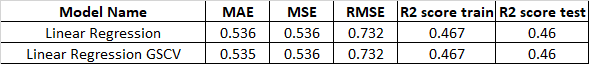

From the above table we can observe there is no improvement in the model using hyperparameter tuning technique.

### ML Model - 2 (Random Forest)

In [ ]:
# ML Model - 2 Implementation
# Fit the Algorithm
Random_forest=RandomForestRegressor()

Random_forest.fit(x_train,y_train)

# Predict on the model
y_predicted_train=Random_forest.predict(x_train)
y_predicted_test=Random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
model_evaluation_metric('Random Forest', y_train, y_predicted_train, y_test, y_predicted_test)

I have used Random Forest Regression model.

Model is showing variance between test and train data.

R2 score of model on test data is 0.798 which is good but as the model is showing variance between test and training data model is not reliable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
param_grid = {
    'n_estimators': [200],
    'min_samples_leaf': [1],
    }

grid_search_cv=GridSearchCV(Random_forest, param_grid, scoring='r2')
grid_search_cv.fit(x_train, y_train)

In [ ]:
# Printing the best parameters and r2 score of Grid Serach CV model
print("Best parameters: ", grid_search_cv.best_params_)
print("Best R2 score: ", grid_search_cv.best_score_)

In [ ]:
# fitting the model on bes estimator
random_forest_gscv = grid_search_cv.best_estimator_
random_forest_gscv.fit(x_train, y_train)

In [ ]:
# predicting the target values from the model based on test data
y_predict_test_cv=random_forest_gscv.predict(x_test)
y_predict_train_cv=random_forest_gscv.predict(x_train)

In [ ]:
# code to get evaluation metrics and plotting the true and predicted values
model_evaluation_metric('Random Forest CV', y_train, y_predict_train_cv , y_test, y_predict_test_cv)

##### Which hyperparameter optimization technique have you used and why?

The goal is to find the best hyperparameters values to get the perfect prediction results from our model.

GridSearchCV which uses the Grid Search technique along with cross-validation for finding the optimal hyperparameters to increase the model performance.

That's why I have used Gridsearch CV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

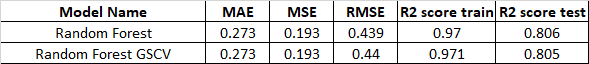

From the above table we can observe there is no improvement in the model using hyperparameter tuning technique.

### ML Model - 3 (Gradient Boosting)

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
gradient_boosting=GradientBoostingRegressor()
gradient_boosting.fit(x_train,y_train)

# Predict on the model
y_predicted_train=gradient_boosting.predict(x_train)
y_predicted_test=gradient_boosting.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
model_evaluation_metric('Gradient Boosting', y_train, y_predicted_train,  y_test, y_predicted_test)

I have used Gradient Boosting Regression model.

Model is not showing any variance between test and train data.

As R2 score on test data is 0.718 and  model is not showing variance on test and train data we can consider model is good.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [7]
    }
grid_search_cv=GridSearchCV(gradient_boosting, param_grid, scoring='r2')
grid_search_cv.fit(x_train, y_train)

In [ ]:
# Printing the best parameters and r2 score of Grid Serach CV model
print("Best parameters: ", grid_search_cv.best_params_)
print("Best R2 score: ", grid_search_cv.best_score_)

In [ ]:
# fitting the model on bes estimator
gradient_boosting_gscv = grid_search_cv.best_estimator_
gradient_boosting_gscv.fit(x_train, y_train)

In [ ]:
# predicting the target values from the model based on test data
y_predict_test_cv=gradient_boosting_gscv.predict(x_test)
y_predict_train_cv=gradient_boosting_gscv.predict(x_train)

In [ ]:
# code to get evaluation metrics and plotting the true and predicted values
model_evaluation_metric('Gradient Boosting CV', y_train, y_predict_train_cv,  y_test, y_predict_test_cv)

##### Which hyperparameter optimization technique have you used and why?

The goal is to find the best hyperparameters values to get the perfect prediction results from our model.

GridSearchCV which uses the Grid Search technique along with cross-validation for finding the optimal hyperparameters to increase the model performance.

That's why I have used Gridsearch CV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

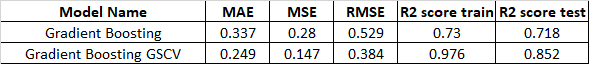

From the above comparision table, we can see there is improvement in all evaluations metrics after using Grid Search CV optimization techniqe.

After hyperparameter tuning models performance is increased but there is also slight increase in variance of model.

### ML Model - 4 (Support Vector Machine)

In [ ]:
# ML Model - 4 Implementation

# Fit the Algorithm
support_vector_machine=SVR(kernel='rbf')
support_vector_machine.fit(x_train,y_train)

# Predict on the model
y_predicted_train=support_vector_machine.predict(x_train)
y_predicted_test=support_vector_machine.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
model_evaluation_metric('Support Vector Machine', y_train, y_predicted_train,  y_test, y_predicted_test)

I have used Support Vector Machine Regression model.

Model is not showing any significant variance between test and train data.

As R2 score on test data is 0.619 and  model model is not good.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
param_grid = {
    'kernel': ['rbf'],
    'C': [10],
    'gamma': [1],
    'epsilon': [0.1]
}

grid_search_cv=GridSearchCV(support_vector_machine, param_grid, scoring='r2')
grid_search_cv.fit(x_train, y_train)

In [ ]:
# Printing the best parameters and r2 score of Grid Serach CV model
print("Best parameters: ", grid_search_cv.best_params_)
print("Best R2 score: ", grid_search_cv.best_score_)

In [ ]:
# fitting the model on best estimator
svm_gscv = grid_search_cv.best_estimator_
svm_gscv.fit(x_train, y_train)

In [ ]:
# predicting the target values from the model based on test data
y_predict_test_cv=svm_gscv.predict(x_test)
y_predict_train_cv=svm_gscv.predict(x_train)

In [ ]:
# code to get evaluation metrics and plotting the true and predicted values
model_evaluation_metric('Support Vector Machine CV', y_train, y_predict_train_cv,  y_test, y_predict_test_cv)

##### Which hyperparameter optimization technique have you used and why?

The goal is to find the best hyperparameters values to get the perfect prediction results from our model.

GridSearchCV which uses the Grid Search technique along with cross-validation for finding the optimal hyperparameters to increase the model performance.

That's why I have used Gridsearch CV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

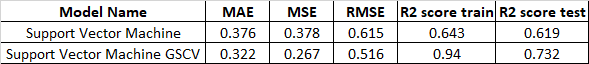

From the above comparision table, we can see there is some improvement in evaluations metrics after using Grid Search CV optimization techniqe. But, model is showing variance between training data and testing data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered R2 score to evaluate the model as it gives the accuracy of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

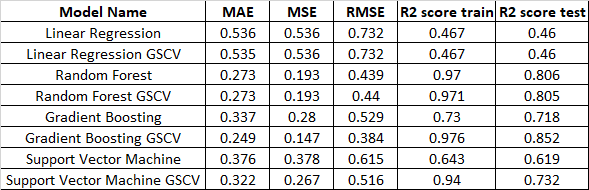

After observing the evaluation metrics of  all models from the above table I choose **Gradient Boosting Regressor with Grid Search CV Hyperparameter Tuning Model** as my final predicting model as

1. R2 is better than other models.
2. Showing less variance between train and test data with good R2 score.
3. All the evaluation metrics are better when compared to other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# creating an explainer object by providing Gradient Boosting model, then calculate SHAP value using a testing set
explainer = shap.Explainer(gradient_boosting_gscv)
shap_values = explainer(x_test)
# Summary plot for first observation
shap.summary_plot(shap_values, x_test)

SHAP (SHapley Additive exPlanations) is a mathematical method to explain the predictions of machine learning models. It is based on the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction. SHAP can determine the most important features and their influence on the model prediction.

In the summary plot we can observe the impact of features on the prediction. The red color indicates that the value of the columns is high and blue color shows that the value of the column is low.

Shap values are also displayed and the impact on the prediction is also shown. Towards the right hand side, the impact is positive (increases the predicted value) and towards the left hand side, the impact is negative (decreases the predicted value).

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Following are some of the Key point:

1. More number of bikes were rented from 7 AM - 9 AM and 4 PM - 10 PM i.e., morning and evening hours.

2. Rented Bike count is high during summer season followed by Autum and spring. The demand is low in winter.

3. June month has highest number og rented bike count than most of the year.

4. When compared to morning hours, Bike demand is more during evening and night hours.

5. Effect of temperature  on rental bike is very high.

6. Rainfall and snowfall has negative impact on rental bike count.

7. On holidays and non-functioning days, the rented Bike count is almost negligible.

8. There is a high correlation between temperature and dew. Point temperature.


I have performed training and prediction on Linear Regression, Random Forest Regressor, Gradient Boosting Regressor and Support Vector Machine ML models along with Hyperparameter tuning and Cross Valiadtion.

After observing the evaluation metrics of all models Gradient Boosting Regression model with Grid Search CV has the highest accuracy (97% on tarining data and 85% on testing data) and showing the least variance on training and testing data. Hence, I choose **Gradient Boosting Regression with Grid Search CV Model** as final deployment model.

With the help of Linear Regression ML Models we can predict the Rented Bike Count for any given time, day and month of the year basing on some of the factors mentioned in the dataset leading to more effective and efficient bike sharing operations, and better business outcomes

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***